# Customer Purchase Behavior Analysis using Descriptive Statistics

# **BASIC CLEANUP**

# **IMPORTING THE DATA SET**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/export?format=csv"
df = pd.read_csv(url)

# **CHECKING FOR THE MISSING VALUES**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


so by seeing the above data we can say that there are 24 data missing in the income field


# **HANDLING THE DATA**

In [ ]:
df['Income'].fillna(df['Income'].mean(), inplace=True)


Here i have handeld the missing values with fillna method and taken the mean(average) value from the income coloumn

# **CONVERTING THE DATA TYPE WITH ERROR HANDLING AND ADDITIONAL FORMAT**

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', format='%m/%d/%Y')
invalid_dates = df[df['Dt_Customer'].isnull()]
print("First Few Rows after Preprocessing:\n", df.head())


First Few Rows after Preprocessing:
       Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0  2014-06-16        0       189  ...              111               189   
1  2014-06-15        0       464  ...                7                 0   
2  2014-05-13        0       134  ...               15                 2   
3         NaT        0        10  ...                0                 0   
4         NaT        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurcha

# ** distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

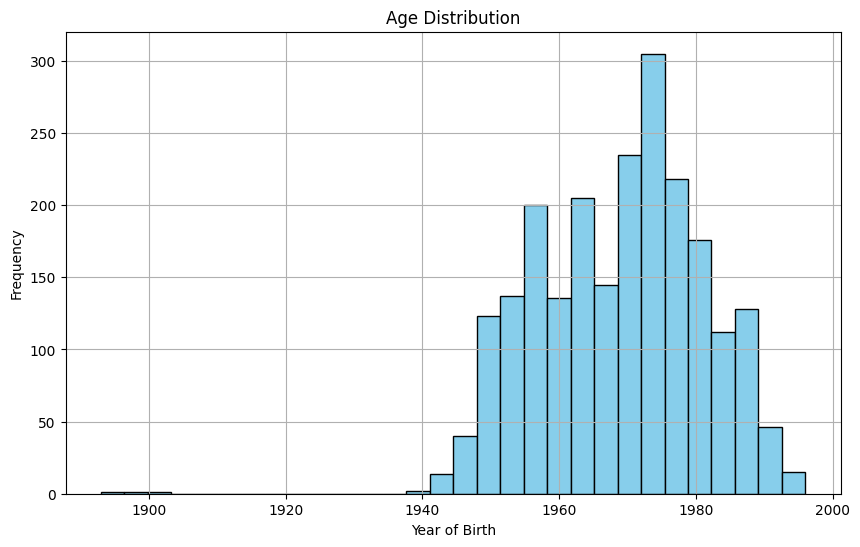

In [ ]:
# age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Year_Birth'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


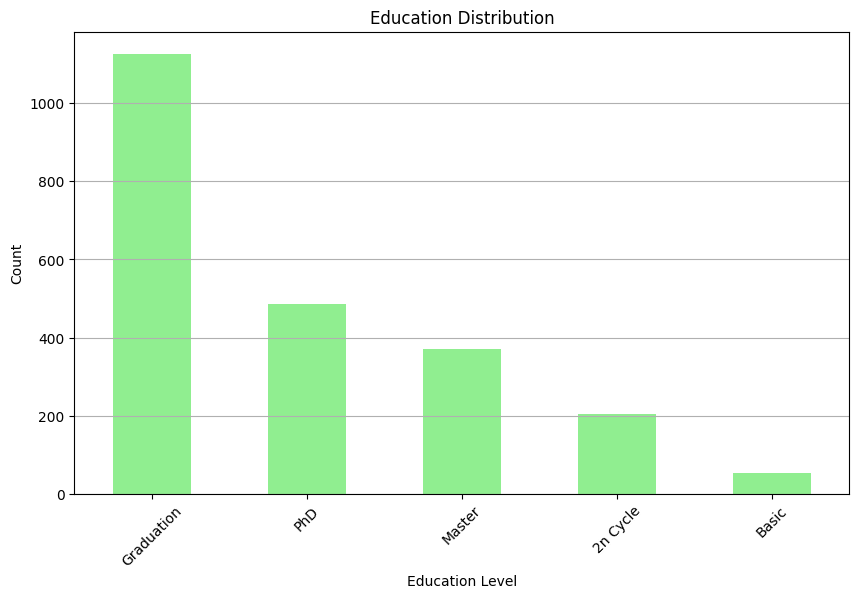

In [ ]:
#education distribution
plt.figure(figsize=(10, 6))
df['Education'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

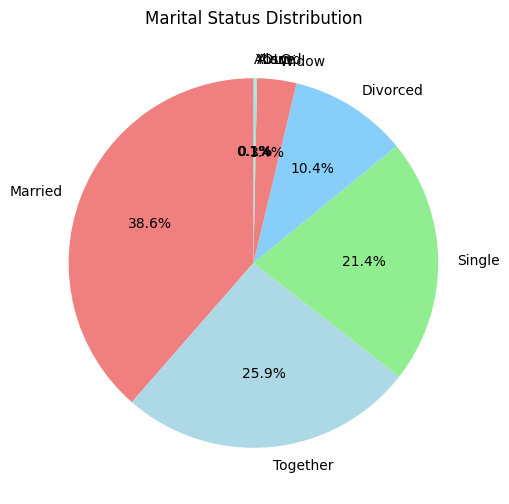

In [ ]:
# marital status distribution
plt.figure(figsize=(10, 6))
df['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightskyblue'])
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

# **SUMMARY**

Approach Taken:

Data Loading:
The dataset was loaded using the provided URL.

Data Cleaning and Preprocessing:
Missing values were identified using the isnull().sum() method.

For missing values in the 'Income' column, the mean value of the column was used for imputation using fillna() method.

The 'Dt_Customer' column was converted to datetime format using pd.to_datetime() method with appropriate error handling.

Analysis of Customer Demographics:
Descriptive statistics and visualizations were utilized to analyze the distribution of customer demographics, including age, education, and marital status.
For age distribution, a histogram was plotted to visualize the frequency of customers' birth years.
For education distribution, a bar plot was created to show the count of customers for each education level.
For marital status distribution, a pie chart was generated to display the proportion of customers in each marital status category.

# **DESCRIPTIVE STATISTICS**

In [ ]:
numerical_variables = ['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']



In [ ]:
# Calculating measures of central tendency and dispersion
central_tendency = df[numerical_variables].agg(['mean', 'median', lambda x: x.mode()[0]], axis=0)
dispersion = df[numerical_variables].agg(['var', 'std'], axis=0)

In [ ]:
# Handling outliers (e.g., using z-score method)
from scipy.stats import zscore
z_scores = zscore(df[numerical_variables])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_indices = df[numerical_variables][outliers.any(axis=1)].index

In [ ]:
# Removing outliers from the dataset
df_cleaned = df.drop(outlier_indices)

In [ ]:
# Recalculate central tendency and dispersion after removing outliers
central_tendency_cleaned = df_cleaned[numerical_variables].agg(['mean', 'median', lambda x: x.mode()[0]], axis=0)
dispersion_cleaned = df_cleaned[numerical_variables].agg(['var', 'std'], axis=0)


In [ ]:
print("Measures of Central Tendency:")
print(central_tendency)
print("\nMeasures of Dispersion:")
print(dispersion)

print("\nAfter Handling Outliers:")
print("Measures of Central Tendency:")
print(central_tendency_cleaned)
print("\nMeasures of Dispersion:")
print(dispersion_cleaned)

Measures of Central Tendency:
           Year_Birth        Income    MntWines  MntFruits  MntMeatProducts  \
mean      1968.805804  52247.251354  303.935714  26.302232           166.95   
median    1970.000000  51381.500000  173.500000   8.000000            67.00   
<lambda>  1976.000000   7500.000000    2.000000   0.000000             7.00   

          MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
mean            37.525446         27.062946     44.021875              2.325   
median          12.000000          8.000000     24.000000              2.000   
<lambda>         0.000000          0.000000      1.000000              1.000   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
mean             4.084821             2.662054           5.790179   
median           4.000000             2.000000           5.000000   
<lambda>         2.000000             0.000000           3.000000   

          NumWebVisitsMonth    Recency  
mean          

# **Probability Distributions**

In [ ]:
# Binomial Distribution - Response (Accepted offer)
from scipy.stats import binom, norm
n_trials = len(df)  # Total number of customers
n_successes = (df['Response']==1).sum()  # Number of customers who accepted the offer
p_success = n_successes / n_trials  # Probability of success
# Calculating probabilities and expected value for k=10 (number of successes)
k_successes = 10
binom_prob = binom.pmf(k_successes, n_trials, p_success) # Probability mass function
binom_expected_value = n_trials * p_success # expected_value

In [ ]:
# Normal Distribution - Income
income_mean = df['Income'].mean()  # Mean income
income_std_dev = df['Income'].std()  # Standard deviation of income

# Calculating probability for income exceeding $70,000
x_income = 70000
norm_prob = 1-norm.cdf(x_income, income_mean, income_std_dev) # Probability of income exceeding $70,000
norm_expected_value = income_mean  # Expected value (mean income)

In [ ]:
print("Probability (k=10):", binom_prob)
print("binom expected value",binom_expected_value)
print("Probability (Income > $70,000):", norm_prob)
print("norm expected value",norm_expected_value)

Probability (k=10): 1.9495863619595234e-138
binom expected value 334.0
Probability (Income > $70,000): 0.2403343013894348
norm expected value 52247.25135379061


In the probability distribution we are considering binomial and normal distribution and for binomial we are getting the value for 10 succesess and n_trials is 1.9495863619595234e-138,and the expected value is 334.0

And for the normal distribution we are taking column income, and we are seeing the probability of income exeeding the 70000
the probability is 0.2403343013894348 and the expected value will be 52247.25135379061.

# **Insights and Customer Segmentation**

<ipython-input-8-c673b5996240>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


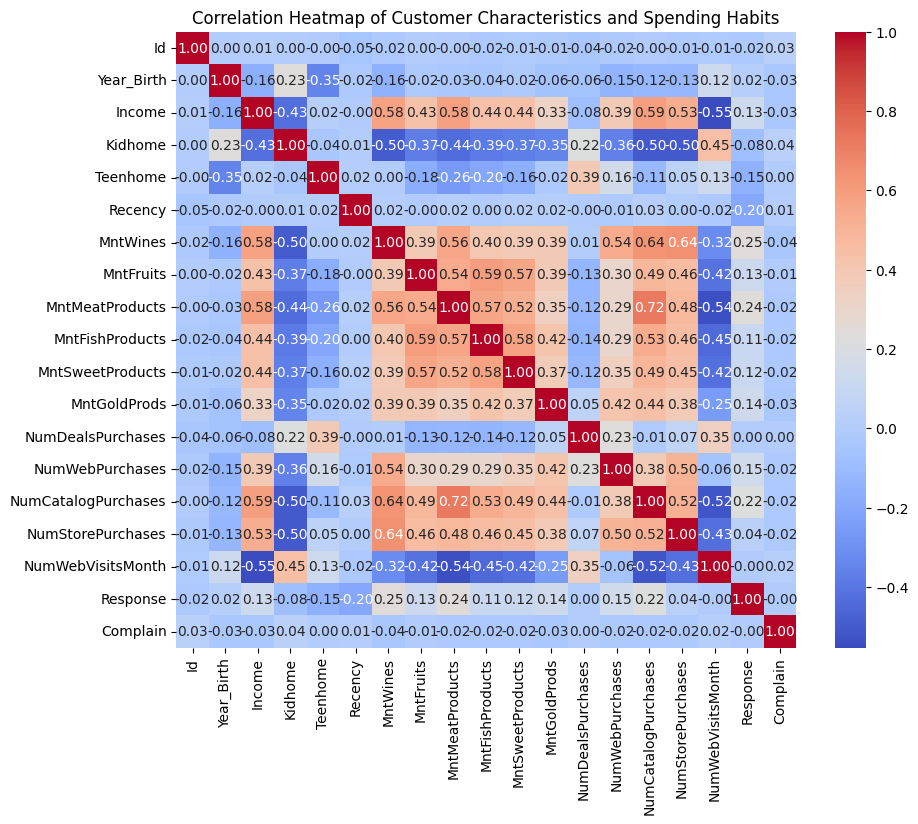

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Customer Characteristics and Spending Habits')
plt.show()

The correlation heatmap is a graphical representation of the correlation matrix, which measures the strength and direction of the linear relationship between pairs of variables in a dataset. In this context, we're interested in understanding the relationships between customer characteristics (such as age, income, education level) and their spending habits (amount spent on various product categories).

color Gradient:
The heatmap uses a color gradient to represent the correlation coefficients.
Positive correlations (where an increase in one variable is associated with an increase in another) are typically shown in shades of red.
Negative correlations (where an increase in one variable is associated with a decrease in another) are shown in shades of blue.
The intensity of the color indicates the strength of the correlation, with darker shades representing stronger correlations.

Correlation Values:
The cells in the heatmap display the correlation coefficients between pairs of variables.
A correlation coefficient close to 1 indicates a strong positive correlation, while a coefficient close to -1 indicates a strong negative correlation.
A coefficient close to 0 suggests no linear relationship between the variables.

diagonal Line:
The diagonal line from the top-left corner to the bottom-right corner of the heatmap represents the correlation of each variable with itself, which is always 1. This indicates perfect correlation.

annotations:
The heatmap may include annotations inside each cell, displaying the actual correlation coefficient rounded to two decimal places.
These annotations provide specific numerical values for each correlation, aiding in interpretation.

interpretation:
Analyze the heatmap to identify patterns and relationships between variables.
Look for clusters of variables with high positive or negative correlations, which suggest strong relationships.
Variables with high positive correlations may indicate that they tend to increase or decrease together, while variables with high negative correlations may indicate an inverse relationship.

# **Conclusion and Recommendations**

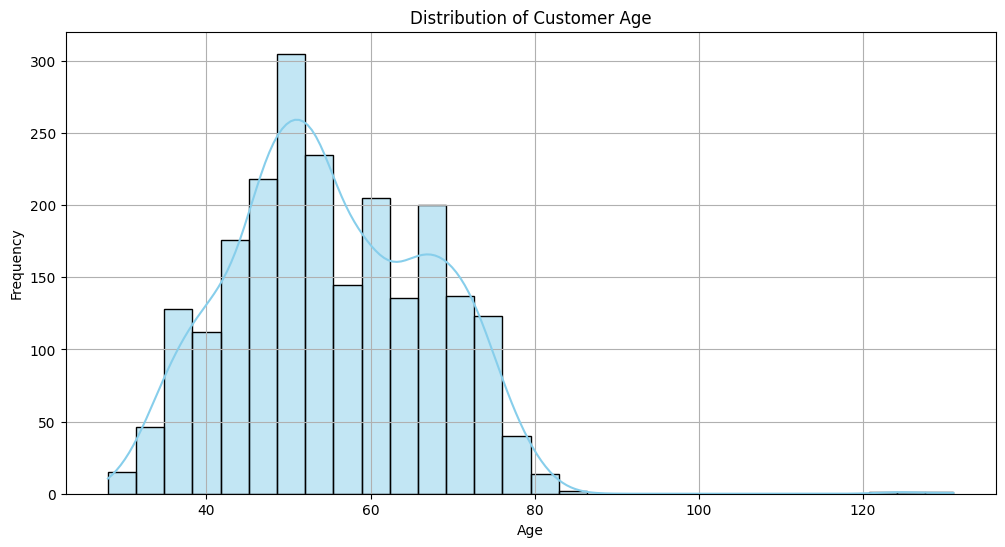

In [ ]:

from datetime import datetime
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

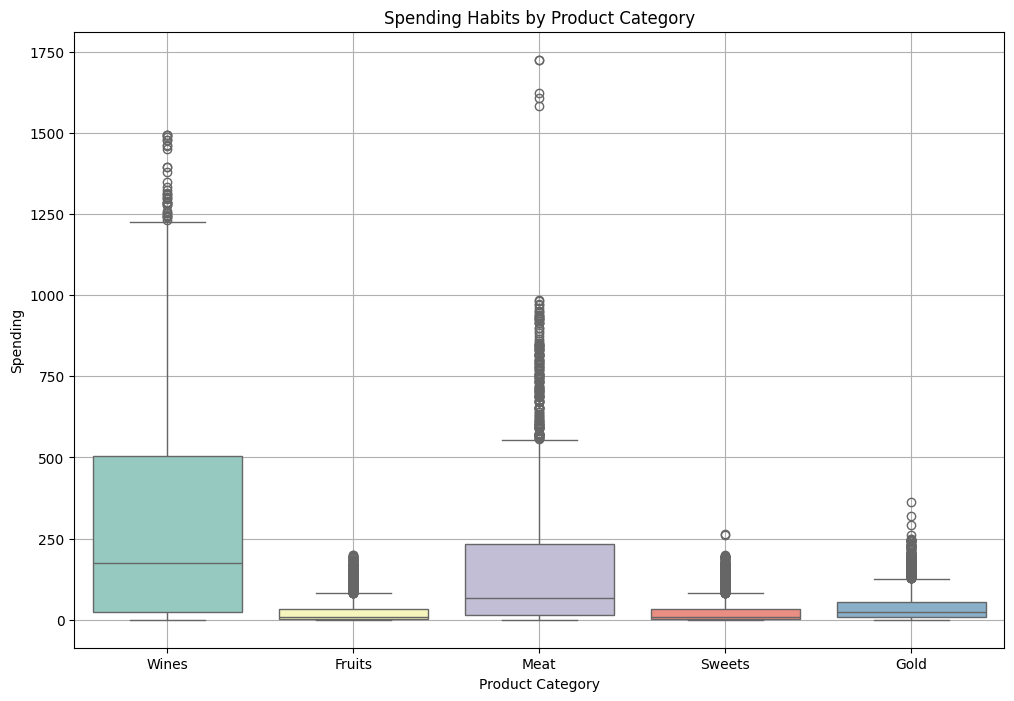

In [ ]:
# Visualizing spending habits by product category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds']], palette='Set3')
plt.title('Spending Habits by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Spending')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Wines', 'Fruits', 'Meat', 'Sweets', 'Gold'])
plt.grid(True)
plt.show()


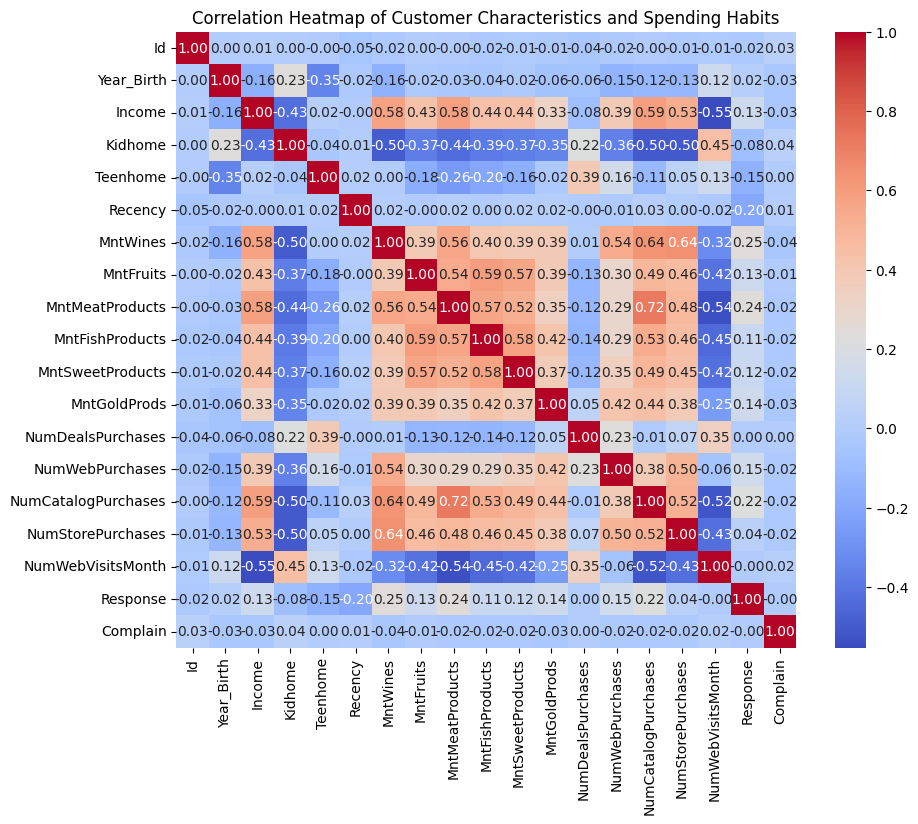

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Customer Characteristics and Spending Habits')
plt.show()

Histogram showing the distribution of customer age.
Box plot visualizing spending habits across different product categories.
Correlation heatmap displaying the relationships between customer characteristics and spending habits.